In [0]:
## helper.py

import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 32, 32).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "CIFAR10":
        ax2.set_yticklabels(['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [198]:
import torch

from torch import nn
from torchvision import datasets, transforms

from torch import optim

import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt

#to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
                               ])
#downloading the dataset
trainset = datasets.CIFAR10('~/.pytorch/CIFAR10_data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

images, labels = next(iter(trainloader))
# imshow(images[0,:])

Files already downloaded and verified


In [199]:
#building model
model = nn.Sequential(nn.Linear(3072,60),
                      nn.ReLU(),
                      nn.Linear(60,10),
                      nn.LogSoftmax(dim=1))


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)

print(model)

Sequential(
  (0): Linear(in_features=3072, out_features=60, bias=True)
  (1): ReLU()
  (2): Linear(in_features=60, out_features=10, bias=True)
  (3): LogSoftmax()
)


In [200]:
epochs = 50
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    images = images.view(images.shape[0],-1)
#     print(images.shape)
#     break
    optimizer.zero_grad()
    
    output = model.forward(images)
#     break
    loss = criterion(output,labels)
    
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
  else:
    print(f"Epoch:{e+1} Training Loss:{running_loss/len(trainloader)}")

Epoch:1 Training Loss:1.688343794754399
Epoch:2 Training Loss:1.5202107780119951
Epoch:3 Training Loss:1.4520480318752396
Epoch:4 Training Loss:1.4035510178417197
Epoch:5 Training Loss:1.3663666635523062
Epoch:6 Training Loss:1.342281121732024
Epoch:7 Training Loss:1.3125325279772435
Epoch:8 Training Loss:1.2920150284267142
Epoch:9 Training Loss:1.2665984292164483
Epoch:10 Training Loss:1.2512467220006391
Epoch:11 Training Loss:1.2320833419594923
Epoch:12 Training Loss:1.2205466865883459
Epoch:13 Training Loss:1.2052521108056578
Epoch:14 Training Loss:1.1890114635762656
Epoch:15 Training Loss:1.1776103750824014
Epoch:16 Training Loss:1.1697580881435852
Epoch:17 Training Loss:1.1542447256615094
Epoch:18 Training Loss:1.147019459920771
Epoch:19 Training Loss:1.1342204511927827
Epoch:20 Training Loss:1.124234664623085
Epoch:21 Training Loss:1.1153862813244695
Epoch:22 Training Loss:1.1050102664991412
Epoch:23 Training Loss:1.0990398309724716
Epoch:24 Training Loss:1.093779609178948
Epoch:

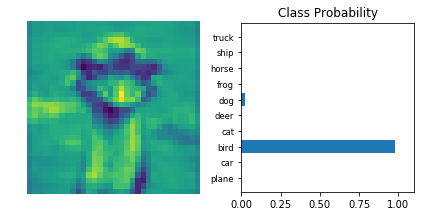

In [208]:
images, labels = next(iter(trainloader))

img = images[0].view(1,3072)
# imshow(images[0,:])
# print(img.shape)

with torch.no_grad():
  logps = model.forward(img)
  
output = torch.exp(logps)

# print(output.shape)
view_classify(img, output, version="CIFAR10")